**Név:** Rafain Emőke

**Szak:** Data Science

# **Exploring Data**
Készítsetek (bármiben):
* egy hisztogramot, amelyen feltüntetitek a mode, median, mean és std értékeket
* egy boxplot vagy egy violin plot ábrát
* egy értékhez igazított (módosított) boxplot vagy violin plot ábrát (az előzőekben kapottakat igazítsátok egymáshoz)
* egy regressziós ábrát (1., 2., 3., … fokú vagy más típusú illesztéssel)
Figyeljetek az adatok helyességére és a részletekre. Összeses 4 ábra.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
sns.set_style("white")
sns.set_palette("tab20")

In [23]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

In [24]:
palette = sns.color_palette()

### **Kaggle BMI Adatok Eloszlása (Átlag, Medián, Módusz és Standard Hiba)**

In [25]:
bmi_data = pd.read_csv("https://raw.githubusercontent.com/vlewir/adatvizualizacio/refs/heads/main/BMI_fit_kaggle.csv")
bmi_data.head()

,ID,Magassag (m),Suly (kg),BMI
0,1,1.74,96,31.71
1,2,1.89,87,24.36
2,3,1.85,110,32.14
3,4,1.95,104,27.35
4,5,1.49,61,27.48


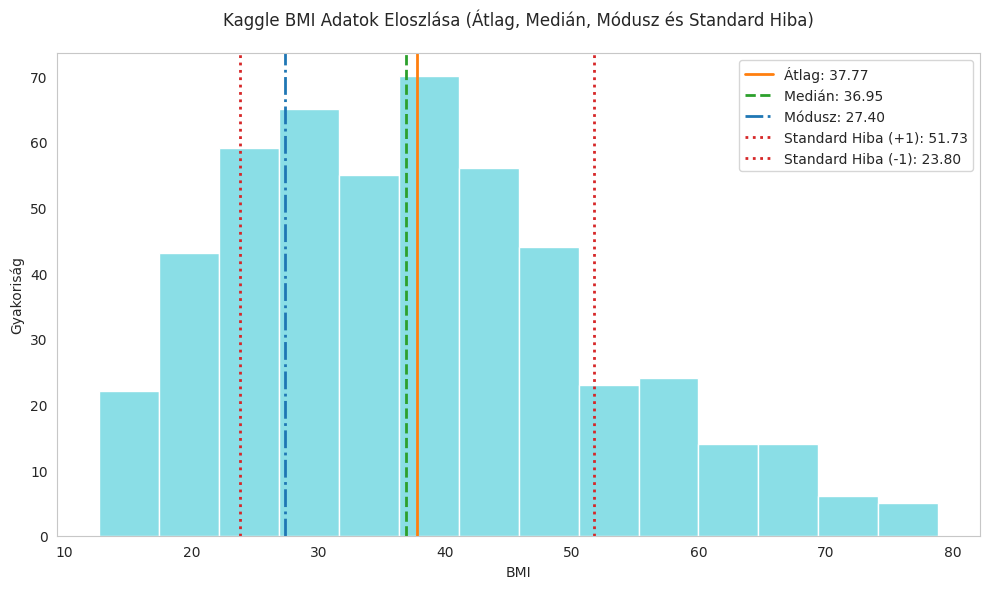

In [26]:
mean_bmi = bmi_data["BMI"].mean()
median_bmi = bmi_data["BMI"].median()
mode_bmi = bmi_data["BMI"].mode().iloc[0]  #In case of multiple modes, select the first one
std_bmi = bmi_data["BMI"].std()

fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(bmi_data["BMI"], color=palette[18], alpha=0.5, ax=ax)

ax.axvline(mean_bmi, color=palette[2], linestyle='-', linewidth=2, label=f'Átlag: {mean_bmi:.2f}')
ax.axvline(median_bmi, color=palette[4], linestyle='--', linewidth=2, label=f'Medián: {median_bmi:.2f}')
ax.axvline(mode_bmi, color=palette[0], linestyle='-.', linewidth=2, label=f'Módusz: {mode_bmi:.2f}')
ax.axvline(mean_bmi + std_bmi, color=palette[6], linestyle=':', linewidth=2, label=f'Standard Hiba (+1): {mean_bmi + std_bmi:.2f}')
ax.axvline(mean_bmi - std_bmi, color=palette[6], linestyle=':', linewidth=2, label=f'Standard Hiba (-1): {mean_bmi - std_bmi:.2f}')

ax.set_title("Kaggle BMI Adatok Eloszlása (Átlag, Medián, Módusz és Standard Hiba)", pad=20)
ax.set_xlabel("BMI")
ax.set_ylabel("Gyakoriság")

spine_color = palette[15]
ax.spines['top'].set_color(spine_color)
ax.spines['bottom'].set_color(spine_color)
ax.spines['left'].set_color(spine_color)
ax.spines['right'].set_color(spine_color)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

### **Teljes Számla Összegek Eloszlása az Étkezési Idő Szerint**

In [27]:
food_data = pd.read_csv("https://raw.githubusercontent.com/vlewir/adatvizualizacio/main/tips.csv")
food_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
food_data["time"].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [29]:
time_translation = {
    "Dinner": "Vacsora",
    "Lunch": "Ebéd"}

food_data["time"] = food_data["time"].map(time_translation)
food_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Vacsora,2
1,10.34,1.66,Male,No,Sun,Vacsora,3
2,21.01,3.50,Male,No,Sun,Vacsora,3
3,23.68,3.31,Male,No,Sun,Vacsora,2
4,24.59,3.61,Female,No,Sun,Vacsora,4


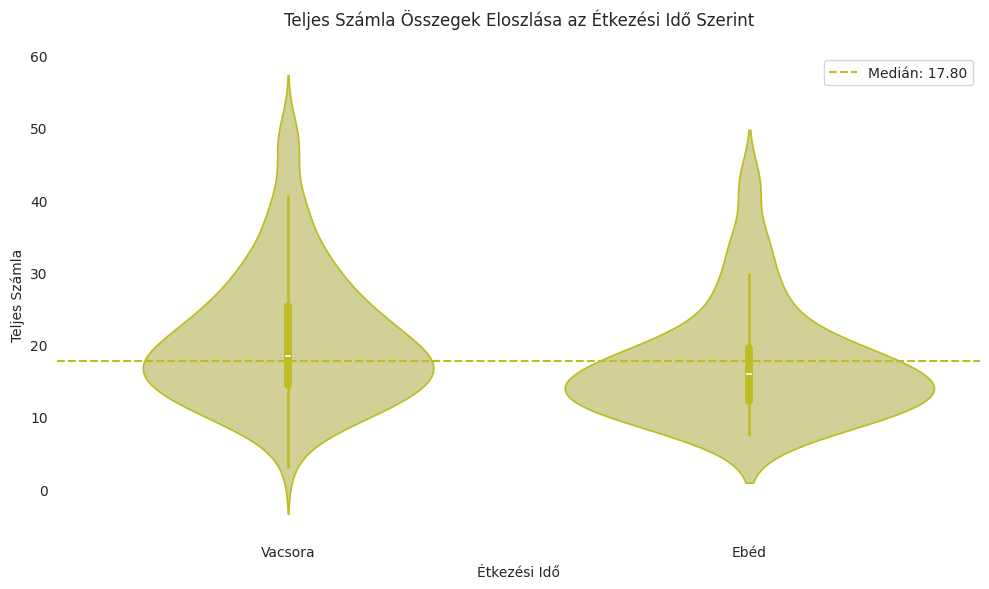

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=food_data, x='time', y='total_bill', color=palette[17], edgecolor=palette[16], ax=ax)

median_total_bill = food_data['total_bill'].median()
median_line = ax.axhline(median_total_bill, color=palette[16], linestyle='--', linewidth=1.5, label=f"Medián: {median_total_bill:.2f}")

ax.legend(loc='upper right')

ax.set_title("Teljes Számla Összegek Eloszlása az Étkezési Idő Szerint", pad=20)
ax.set_xlabel("Étkezési Idő")
ax.set_ylabel("Teljes Számla")
ax.spines[["top", "right", "left", "bottom"]].set_visible(False)

plt.tight_layout()
plt.show()

### **Középértékhez Igazított Teljes Számla Összegek Eloszlása Étkezési Idő Szerint**

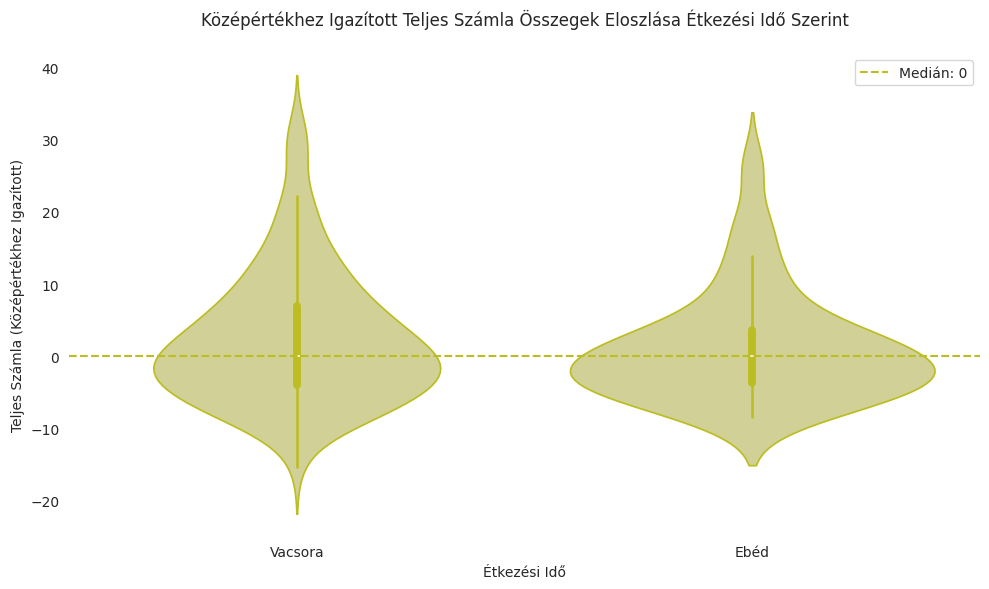

In [31]:
#Calculating the median of "total_bill" for each "time" category and centralize the values

food_data['centralized_total_bill'] = food_data['total_bill'] - food_data.groupby('time')['total_bill'].transform('median')

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=food_data, x='time', y='centralized_total_bill', color=palette[17], edgecolor=palette[16], ax=ax)

zero_line = ax.axhline(0, color=palette[16], linestyle='--', linewidth=1.5, label="Medián: 0")

ax.legend(loc='upper right')

ax.set_title("Középértékhez Igazított Teljes Számla Összegek Eloszlása Étkezési Idő Szerint", pad=20)
ax.set_xlabel("Étkezési Idő")
ax.set_ylabel("Teljes Számla (Középértékhez Igazított)")
ax.spines[["top", "right", "left", "bottom"]].set_visible(False)

plt.tight_layout()
plt.show()

### **Súly és BMI Összefüggése - Lineáris Regresszió (Kaggle BMI Adatok)**

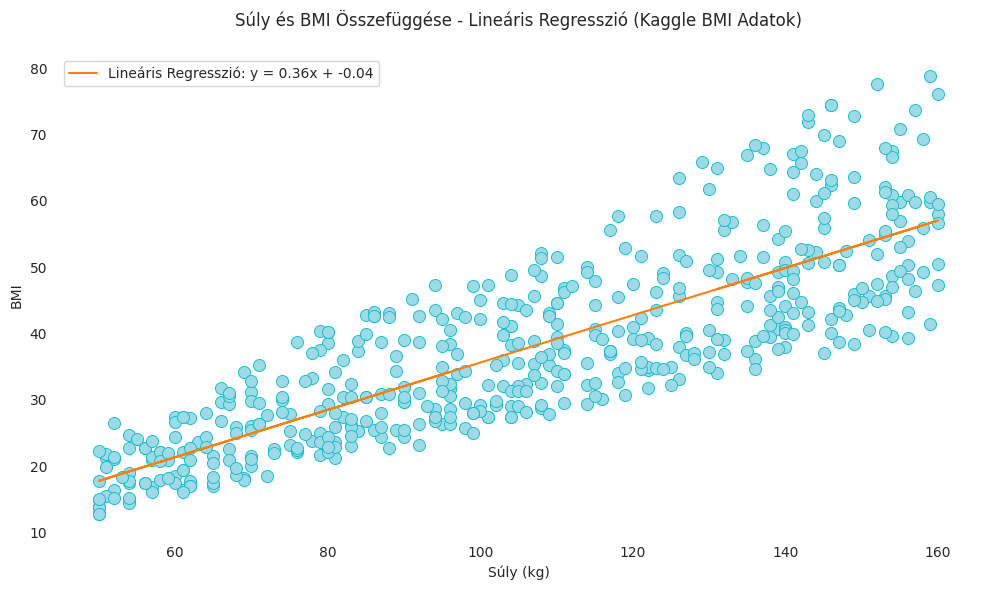

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x=bmi_data["Suly (kg)"], y=bmi_data["BMI"], ax=ax, color=palette[19], edgecolor=palette[18], s=75)

#Performing a first-degree polynomial regression (linear regression)

slope, intercept = np.polyfit(bmi_data["Suly (kg)"], bmi_data["BMI"], 1)
regression_line = slope * bmi_data["Suly (kg)"] + intercept

ax.plot(bmi_data['Suly (kg)'], regression_line, color=palette[2], label=f'Lineáris Regresszió: y = {slope:.2f}x + {intercept:.2f}')

ax.set_title("Súly és BMI Összefüggése - Lineáris Regresszió (Kaggle BMI Adatok)", pad=20)
ax.set_xlabel("Súly (kg)")
ax.set_ylabel("BMI")
ax.legend()
ax.spines[["top", "right", "bottom", "left"]].set_visible(False)

plt.tight_layout()
plt.show()